In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
#Units
mm_2_aGgula = 1/17.65 #1mm equals 17.65 aṅgula-s
hour_2_nADI = 60/24
#Constants
g = 9.80665 * 1000 * mm_2_aGgula / ((1/3600) * hour_2_nADI)**2 #Acceleration due to gravity in aṅgula/nāḍī^2
#Parameters
ghaTikAGgula = 1 #number of aṅgula-s fallen in 1 nāḍī
r0 = 0.5*mm_2_aGgula #hole radius in mm
T = 60 #Total time of operation in nāḍī-s
#Equation of container curve
h = lambda r, r0: (ghaTikAGgula**2/(2*g))*((r/r0)**4-1) #v = T*ghaTikAGgula/T
r = lambda h, r0: r0*((1+((2*g*h)/(ghaTikAGgula**2)))**0.25) #v = T*ghaTikAGgula/T

def computeshape(r0, ghaTikAGgula, T, c='b', lines=True, box=False, verbose=True):
    ys = list(np.linspace(0, T*ghaTikAGgula, T+1))
    plt.plot([r(h, r0) for h in ys], ys, '.-', color=c, label="ghaṭīkāṅgula = %s aṅgula"  %ghaTikAGgula)
    plt.plot([-r(h, r0) for h in ys], ys, '.-', color=c)
    if verbose:    
        print("Ghaṭikāṅgula = %s aṅgula-s = %s mm:" %(ghaTikAGgula, ghaTikAGgula/mm_2_aGgula))
        print("\tupper radius = %s aṅgula-s = %s mm" %(r(T*ghaTikAGgula, r0), r(T*ghaTikAGgula, r0)/mm_2_aGgula))
        print("\tupper diameter = %s aṅgula-s = %s mm" %(2*r(T*ghaTikAGgula, r0), 2*r(T*ghaTikAGgula, r0)/mm_2_aGgula))
        print("\ttotal height = %s aṅgula-s = %s mm" %(T*ghaTikAGgula, T*ghaTikAGgula/mm_2_aGgula))
        print("\thbya = %s" %(2*g/ghaTikAGgula))
        
        print("\tvolume of water required for")
        for t in range(1, T+1):
            V = volumes_of_water(t,0.001,r0,ghaTikAGgula,T)
            print("\t\t%s nāḍī-s: %s aṅgula^3 = %s l" %(t, V, V/((mm_2_aGgula*100)**3)))
        
    if lines:
        [plt.hlines(y=h, xmin=0, xmax=r(h, r0), color=c) for h in ys]
    
    if box:
        plt.hlines(0, xmin=0, xmax=r(T*ghaTikAGgula, r0), color=c)
        plt.vlines(r(ghaTikAGgula*T, r0), ymin=0, ymax=T*ghaTikAGgula, color=c)
        plt.hlines(ghaTikAGgula*T, xmin=0, xmax=r(T*ghaTikAGgula, r0), color=c)
        plt.vlines(0, ymin=0, ymax=T*ghaTikAGgula, color=c)

mouldvol = lambda r0, ghaTikAGgula, T: ghaTikAGgula*T*4*(r(ghaTikAGgula*T, r0)**2)

def volumes_of_water(total_time, dh, r0, ghaTikAGgula, T):
    total_height = total_time*ghaTikAGgula
    volume = 0
    h = 0
    while h <= total_height:
        volume = volume + dh*np.pi*r(h, r0)**2
        h = h + dh
    return volume

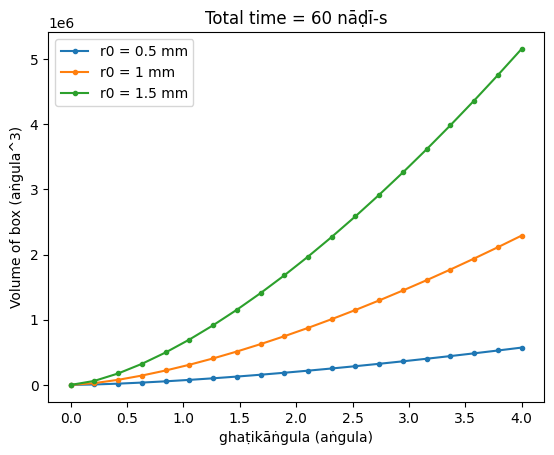

In [28]:

ghaTikAGgulas = list(np.linspace(0, 4, 20))
for r0 in [0.5, 1, 1.5]:
    r1 = r0*mm_2_aGgula
    plt.plot(ghaTikAGgulas, [mouldvol(r1, gh, T) for gh in ghaTikAGgulas], ".-", label="r0 = %s mm" %r0)

plt.title("Total time = %s nāḍī-s" %T)
plt.ylabel("Volume of box (aṅgula^3)")
plt.xlabel("ghaṭikāṅgula (aṅgula)")
plt.legend()
plt.show()

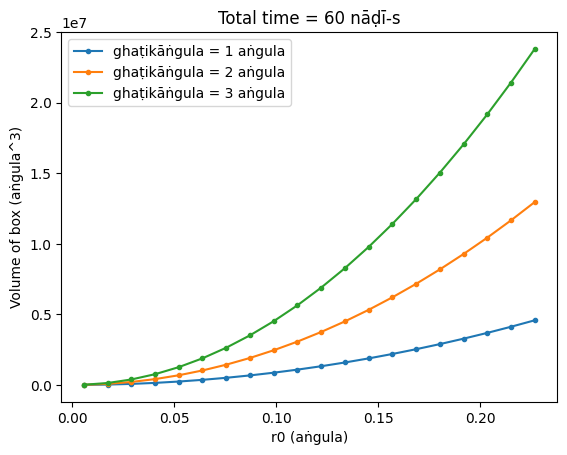

In [29]:
r0s = list(np.linspace(0.1*mm_2_aGgula, 4*mm_2_aGgula, 20))
for gh in [1, 2, 3]:
    plt.plot(r0s, [mouldvol(r1, gh, T) for r1 in r0s], ".-", label="ghaṭikāṅgula = %s aṅgula" %gh)

plt.title("Total time = %s nāḍī-s" %T)
plt.xlabel("r0 (aṅgula)")
plt.ylabel("Volume of box (aṅgula^3)")
plt.legend()
plt.show()

Ghaṭikāṅgula = 1 aṅgula-s = 17.65 mm:
	upper radius = 8.168425355363873 aṅgula-s = 144.17270752217235 mm
	upper diameter = 16.336850710727745 aṅgula-s = 288.3454150443447 mm
	total height = 3 aṅgula-s = 52.949999999999996 mm
	hbya = 2304257160.3399434
	volume of water required for
		1 nāḍī-s: 80.6203330435723 aṅgula^3 = 0.44328059191499425 l
		2 nāḍī-s: 228.28690347566737 aṅgula^3 = 1.2552063465731746 l
		3 nāḍī-s: 419.3380773107371 aṅgula^3 = 2.305676795236451 l
Ghaṭikāṅgula = 4 aṅgula-s = 70.6 mm:
	upper radius = 5.775948961020591 aṅgula-s = 101.94549916201342 mm
	upper diameter = 11.551897922041181 aṅgula-s = 203.89099832402684 mm
	total height = 12 aṅgula-s = 211.79999999999998 mm
	hbya = 576064290.0849859
	volume of water required for
		1 nāḍī-s: 161.39332477429457 aṅgula^3 = 0.8874005581000529 l
		2 nāḍī-s: 456.36125099294804 aṅgula^3 = 2.5092439813897536 l
		3 nāḍī-s: 838.5203267028511 aṅgula^3 = 4.610496790588848 l


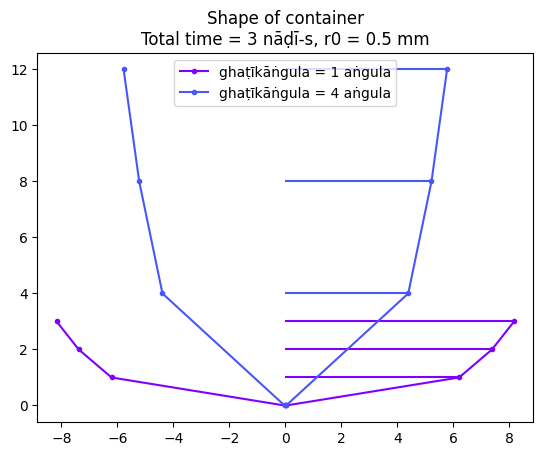

In [30]:
T=3
r0 = 0.5*mm_2_aGgula
color = iter(cm.rainbow(np.linspace(0, 1, 10)))
for ghaTikAGgula in [1,4]:
    c = next(color)
    computeshape(r0, ghaTikAGgula, T, c, lines=True, box=False)

plt.title("Shape of container\nTotal time = %s nāḍī-s, r0 = %s mm" %(T, r0/mm_2_aGgula))
plt.axis("equal")
plt.legend()
plt.show()

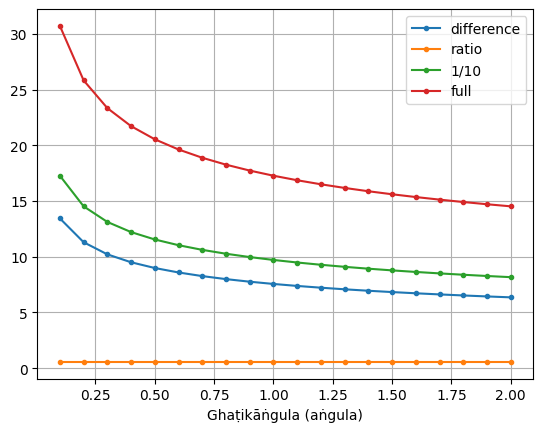

In [31]:
T = 60
rgh = lambda h, gh: r0*(((h/((gh**2/(2*g))))+1)**0.25)
diff = lambda gh: -rgh(T*gh/10, gh)+rgh(T*gh, gh)
ratio = lambda gh: rgh(T*gh/10, gh)/rgh(T*gh, gh)
gh = np.linspace(0.1,2,20)
plt.plot(gh, diff(gh), '.-', label="difference")
plt.plot(gh, ratio(gh), '.-', label="ratio")
plt.plot(gh, rgh(T*gh/10, gh), '.-', label="1/10")
plt.plot(gh, rgh(T*gh, gh), '.-', label="full")
# plt.axis([0, 10, 0, 1])
plt.xlabel("Ghaṭikāṅgula (aṅgula)")
plt.grid()
plt.legend()
plt.show()